In [ ]:
import pandas as pd
from math import*
from numpy import*
from pylab import*
import numpy as np
import matplotlib.pyplot as plt
from pylab import*
import numpy as np
import xarray as xr
import matplotlib
import scipy.stats as st

In [ ]:
from scipy.stats import gamma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xgrads
!pip install cartopy
!pip install --no-binary shapely shapely --force

  Using cached Shapely-1.7.1.tar.gz (383 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from xgrads import CtlDescriptor
from xgrads import open_CtlDataset
data_1 = CtlDescriptor(file='GPCC_INA.ctl')

In [ ]:
data=np.fromfile('GPCC_INA.dat',dtype=np.float32)
data_1_ctl = open_CtlDataset('GPCC_INA.ctl')
data_2 = pd.read_excel('monthly.clim.idx.1948.2015.xlsx', header = 0, usecols =['Time', 'SOI', 'DMI'] )

In [ ]:
reshape_data = np.reshape(data,(768,41,101))

Memilih Kejadian ENSO Kuat dan IOD + Kuat

In [ ]:
nino_kuat=data_2[(data_2['SOI'] >= -3.5) & (data_2['SOI'] <= -2 )]
iod_kuat = data_2[(data_2['DMI'] >= 1) & (data_2['DMI'] <= 3)]

In [ ]:
print(nino_kuat)

          Time   SOI    DMI
64  1953-05-01 -2.72  0.396
158 1961-03-01 -2.47 -0.022
210 1965-07-01 -2.32 -0.376
353 1977-06-01 -2.33  0.019
361 1978-02-01 -2.63 -0.450
398 1981-03-01 -2.01  0.127
413 1982-06-01 -2.49  0.369
415 1982-08-01 -2.66  0.369
416 1982-09-01 -2.12  0.548
417 1982-10-01 -2.20  0.783
418 1982-11-01 -3.25  0.407
419 1982-12-01 -2.48 -0.093
420 1983-01-01 -3.36 -0.416
421 1983-02-01 -3.46 -0.507
422 1983-03-01 -3.25 -0.652
470 1987-03-01 -2.03 -0.037
471 1987-04-01 -2.69 -0.081
472 1987-05-01 -2.12  0.244
473 1987-06-01 -2.69  0.223
527 1991-12-01 -2.02  0.153
528 1992-01-01 -2.85 -0.256
530 1992-03-01 -2.85 -0.571
531 1992-04-01 -2.06 -0.478
537 1992-10-01 -2.03 -0.467
543 1993-04-01 -2.29 -0.106
545 1993-06-01 -2.18  0.006
555 1994-04-01 -2.63  0.426
559 1994-08-01 -2.03  0.923
592 1997-05-01 -2.41  0.105
593 1997-06-01 -3.02  0.195
595 1997-08-01 -2.31  0.746
600 1998-01-01 -2.53  0.590
602 1998-03-01 -3.31  0.045
603 1998-04-01 -2.80  0.122
685 2005-02-01 -2.99

In [ ]:
print(iod_kuat)

          Time   SOI    DMI
597 1997-10-01 -1.69  1.033
598 1997-11-01 -1.31  1.402


Dari kejadian yang telah terseleksi, maka kita memilih kejadian El-Nino Kuat bulan Oktober 1982 dan IOD+ Kuat bulan November 1997.

**El Nino Kuat pada Oktober 1982**

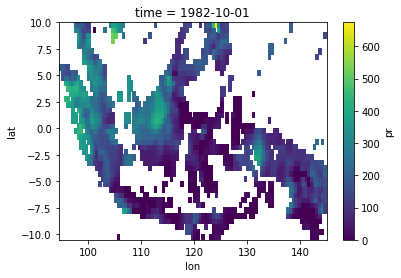

In [ ]:
dset_baru = data_1_ctl.where(data_1_ctl['pr']>=0)
dset_baru['pr'][393][:][:].plot() 

In [ ]:
dset_baru = data_1_ctl.where(data_1_ctl['pr'].values>=0)
dset_baru['pr'].values 

array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ..., 182.18, 217.13,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan, 100.77],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ..., 340.82, 642.61,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,  82.47],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ..., 134.5 ,  93.61,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   

In [ ]:
from datetime import datetime
CH_Okt_82 = dset_baru.sel(time=datetime.strptime("1982-10-1 00:00", "%Y-%m-%d %H:%M"))
CH_Okt_82 

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 101)
Coordinates:
    time     datetime64[ns] 1982-10-01
  * lat      (lat) float32 -10.25 -9.75 -9.25 -8.75 ... 8.25 8.75 9.25 9.75
  * lon      (lon) float32 94.75 95.25 95.75 96.25 ... 143.2 143.8 144.2 144.8
Data variables:
    pr       (lat, lon) float32 dask.array<chunksize=(41, 101), meta=np.ndarray>
Attributes:
    comment:  99 monthly rainfal
    storage:  99
    title:    GPCC
    undef:    -999000000.0
    pdef:     None

In [ ]:
Oct = pd.date_range(start='1950-10-01', end='2013-10-01', freq='12MS')
CH_all_Oct = dset_baru.sel(time=Oct)
CH_all_Oct['pr'].values

array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,   6.37,   3.9 ,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan, 333.23],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,  10.31,  21.23,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan, 313.4 ],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,  12.65,   1.78,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   

Fitting gamma untuk seluruh kejadian bulan Oktober di seluruh Indonesia

In [ ]:
lat=data_1_ctl.lat.values
lon=data_1_ctl.lon.values
print(lat)
print(lon)

[-10.25  -9.75  -9.25  -8.75  -8.25  -7.75  -7.25  -6.75  -6.25  -5.75
  -5.25  -4.75  -4.25  -3.75  -3.25  -2.75  -2.25  -1.75  -1.25  -0.75
  -0.25   0.25   0.75   1.25   1.75   2.25   2.75   3.25   3.75   4.25
   4.75   5.25   5.75   6.25   6.75   7.25   7.75   8.25   8.75   9.25
   9.75]
[ 94.75  95.25  95.75  96.25  96.75  97.25  97.75  98.25  98.75  99.25
  99.75 100.25 100.75 101.25 101.75 102.25 102.75 103.25 103.75 104.25
 104.75 105.25 105.75 106.25 106.75 107.25 107.75 108.25 108.75 109.25
 109.75 110.25 110.75 111.25 111.75 112.25 112.75 113.25 113.75 114.25
 114.75 115.25 115.75 116.25 116.75 117.25 117.75 118.25 118.75 119.25
 119.75 120.25 120.75 121.25 121.75 122.25 122.75 123.25 123.75 124.25
 124.75 125.25 125.75 126.25 126.75 127.25 127.75 128.25 128.75 129.25
 129.75 130.25 130.75 131.25 131.75 132.25 132.75 133.25 133.75 134.25
 134.75 135.25 135.75 136.25 136.75 137.25 137.75 138.25 138.75 139.25
 139.75 140.25 140.75 141.25 141.75 142.25 142.75 143.25 143.75 144.

In [ ]:
parameter=np.zeros([3,41,101])

for i in range(40):
    for j in range(100):
        ch_okt = reshape_data[9:768:12,:,:]
        if (any(np.isnan(ch_okt[:,i,j]))):
              parameter[:,i,j]=np.nan
        else :
              parameter[:,i,j]=st.gamma.fit(ch_okt[:,i,j])

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:406: RuntimeWarning: invalid value encountered in true_divide
  return m3 / np.power(m2, 1.5)


In [ ]:
Fx = pd.DataFrame(np.array([[np.nan] * len(lon)] * len(lat)))

for j in range(101):
  for i in range(41):
    CH =dset_baru.sel(time=Oct,lon=lon[j],lat=lat[i],method='nearest')
    ch_oct_82=CH['pr'].sel(time='1982-10-01').values
    ch_all_oct=CH['pr'].values

    if all(np.isnan(ch_all_oct)) == True:
        Fx[j][i]=np.nan 
    else:
        ch_all_oct=[ch for ch in ch_all_oct if np.isnan(ch) == False ]
        parameter=st.gamma.fit(ch_all_oct)
 
    #Persentil curah hujan pada bulan Oktober 1982
        Fx[j][i]=(st.gamma.cdf(ch_oct_82,*parameter)) 

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip (133.1 MB)


In [ ]:
!pip install pyproj==1.9.6

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ws = dset_baru.pr.sel(lat=-8.75, lon=121.25)
wss= ws.dropna(dim='time')

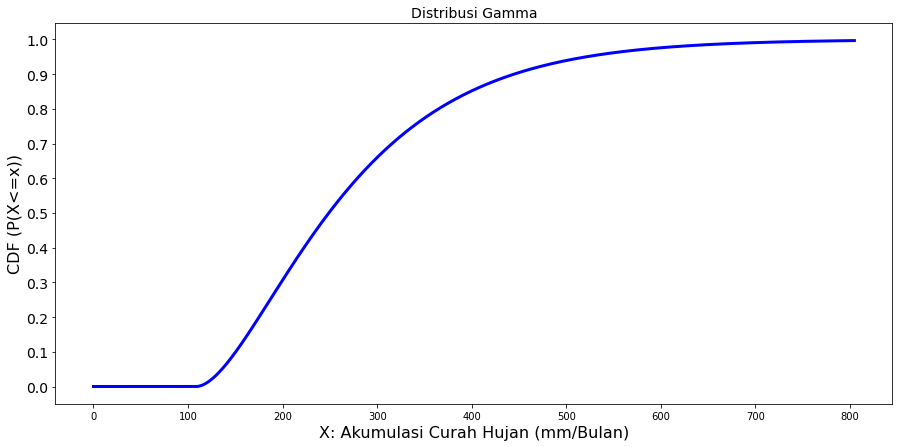

In [ ]:
x = np.linspace(wss.min(), wss.max(), 1000)
plt.figure(figsize=(15,7))
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.title('Distribusi Gamma', fontsize=14)
plt.xlabel('X: Akumulasi Curah Hujan (mm/Bulan)', fontsize=16)
plt.ylabel('CDF (P(X<=x))', fontsize=16)

#Kurva cdf
fx = gamma.cdf(x,*parameter)
plt.plot(x, fx, color='blue', linewidth=3)

In [ ]:
Pr_PPF=gamma.ppf(0,*parameter)
Pr_PPF

108.71983772697754

In [ ]:
Pr_PPF=gamma.ppf(0.5,*parameter)
Pr_PPF

248.86903163615057

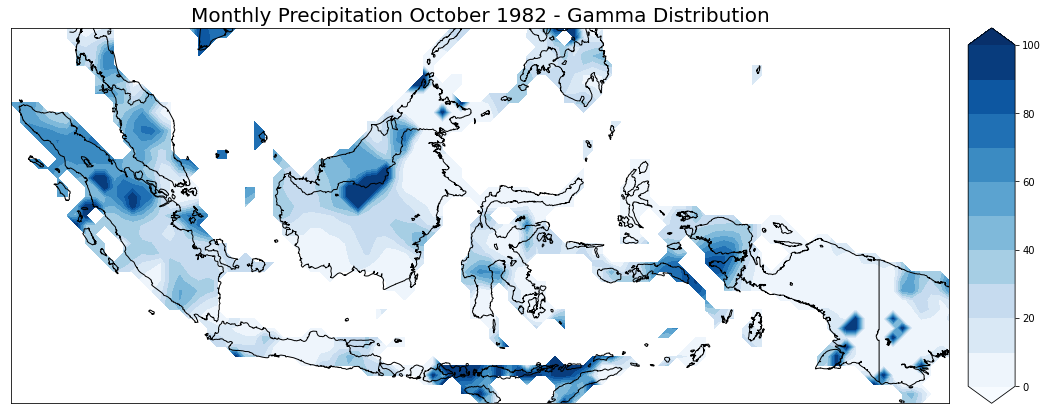

In [ ]:
levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(18,8))
m = Basemap(projection='cyl',llcrnrlon=94.75,llcrnrlat=-10.25,
            urcrnrlon=144.75,urcrnrlat=9.75,resolution='i')

m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
lons, lats = m.makegrid(101,41)
x,y = m(lons,lats)

cs = m.contourf(x, y, Fx*100, cmap='Blues', levels=levels, extend='both', zorder=1)
cbar = m.colorbar(cs, location='right', pad='2%')
plt.title('Monthly Precipitation October 1982 - Gamma Distribution',fontdict={'fontsize':20})
plt.show() 

Anomali

In [ ]:
Anomali = CH_Okt_82 - CH_all_Oct.groupby(CH_all_Oct['time.month']).mean()

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


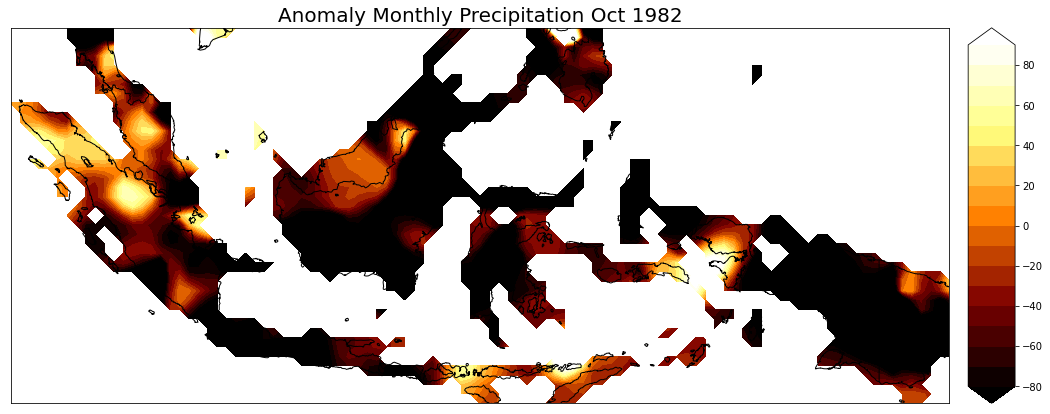

In [ ]:
levels = np.arange(-80,100,10)

plt.figure(figsize=(18,8))
m = Basemap(projection='cyl',llcrnrlon=94.75,llcrnrlat=-10.25,
            urcrnrlon=144.75,urcrnrlat=9.75,resolution='i')

m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
lons, lats = m.makegrid(101,41)
x,y = m(lons,lats)

cs = m.contourf(x, y, Anomali.pr.sel(month = 10), cmap='afmhot', levels=levels, extend='both', zorder=1)
cbar = m.colorbar(cs, location='right', pad='2%')
plt.title('Anomaly Monthly Precipitation Oct 1982',fontdict={'fontsize':20})
plt.show()